In [1]:


from google.colab import files
uploaded=files.upload()





Saving kaggle.json to kaggle.json


In [2]:

%mkdir ~/.kaggle


%cp kaggle.json ~/.kaggle



import os
os.chmod("kaggle.json",600)

In [3]:

from kaggle.api.kaggle_api_extended import KaggleApi

from time import time 

s=time()

api = KaggleApi()

api.authenticate()

#api.dataset_download_files("ming666/flicker8k-dataset")

api.dataset_download_files("moltean/fruits")
#api.dataset_download_files("vipoooool/new-plant-diseases-dataset")



e=time()

diff=e-s

print(diff)


27.451936960220337


In [4]:
%ls

fruits.zip  kaggle.json*  sample_data/


In [5]:
from zipfile import ZipFile 

# specifying the zip file name 
#file_name = "flicker8k-dataset.zip"
#file_name ="/content/rice-diseases-image-dataset.zip" it is the 12gb dataset on kaggle 
file_name ="fruits.zip"


# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
  # printing all the contents of the zip file 
  zip.printdir() 

  # extracting all the files 
  print('Extracting all the files now...') 
  zip.extractall() 
print('Done!') 

Streaming output truncated to the last 5000 lines.
fruits-360/Training/Tomato 3/113_100.jpg       2020-05-18 10:42:46         4225
fruits-360/Training/Tomato 3/114_100.jpg       2020-05-18 10:42:46         4275
fruits-360/Training/Tomato 3/115_100.jpg       2020-05-18 10:42:46         4227
fruits-360/Training/Tomato 3/116_100.jpg       2020-05-18 10:42:46         4272
fruits-360/Training/Tomato 3/117_100.jpg       2020-05-18 10:42:46         4226
fruits-360/Training/Tomato 3/119_100.jpg       2020-05-18 10:42:46         4266
fruits-360/Training/Tomato 3/120_100.jpg       2020-05-18 10:42:46         4238
fruits-360/Training/Tomato 3/121_100.jpg       2020-05-18 10:42:46         4236
fruits-360/Training/Tomato 3/122_100.jpg       2020-05-18 10:42:46         4245
fruits-360/Training/Tomato 3/123_100.jpg       2020-05-18 10:42:46         4312
fruits-360/Training/Tomato 3/124_100.jpg       2020-05-18 10:42:46         4246
fruits-360/Training/Tomato 3/125_100.jpg       2020-05-18 10:42:46   

In [6]:
import os 
os.remove("fruits.zip")

In [7]:
import os
import torch
import torchvision
import tarfile
import matplotlib
import matplotlib.pyplot as plt
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torch import nn
import torch.nn.functional as F

In [8]:
data_dir = '/content/fruits-360'

print(os.listdir(data_dir)) #folders in the dataset folder
classes = os.listdir(data_dir + "/Training")
#print first 10 classes
print(classes[:10])

['Test', 'Training', 'readme.md', 'test-multiple_fruits', 'LICENSE', 'papers']
['Cherry Wax Black', 'Pear Kaiser', 'Pepper Yellow', 'Redcurrant', 'Cucumber Ripe', 'Apple Pink Lady', 'Rambutan', 'Nut Forest', 'Avocado', 'Mulberry']


In [9]:
pineapple_files = os.listdir(data_dir + "/Training/Pineapple")
print('No. of training images for pineapples:', len(pineapple_files))
print(pineapple_files[:5],len(pineapple_files))

No. of training images for pineapples: 490
['r_309_100.jpg', 'r_242_100.jpg', '53_100.jpg', '79_100.jpg', '299_100.jpg'] 490


In [10]:
fig_test_files = os.listdir(data_dir + "/Test/Fig")
print('No. of test images for figs:', len(fig_test_files))
print(fig_test_files[:5])

No. of test images for figs: 234
['r_309_100.jpg', '53_100.jpg', 'r2_160_100.jpg', 'r_218_100.jpg', 'r2_112_100.jpg']


In [11]:
#create a dictionary to hold the count
train_image_count = {}
for item in classes:
    train_image_count[item] = 0
train_image_count

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 0,
 'Apple Golden 1': 0,
 'Apple Golden 2': 0,
 'Apple Golden 3': 0,
 'Apple Granny Smith': 0,
 'Apple Pink Lady': 0,
 'Apple Red 1': 0,
 'Apple Red 2': 0,
 'Apple Red 3': 0,
 'Apple Red Delicious': 0,
 'Apple Red Yellow 1': 0,
 'Apple Red Yellow 2': 0,
 'Apricot': 0,
 'Avocado': 0,
 'Avocado ripe': 0,
 'Banana': 0,
 'Banana Lady Finger': 0,
 'Banana Red': 0,
 'Beetroot': 0,
 'Blueberry': 0,
 'Cactus fruit': 0,
 'Cantaloupe 1': 0,
 'Cantaloupe 2': 0,
 'Carambula': 0,
 'Cauliflower': 0,
 'Cherry 1': 0,
 'Cherry 2': 0,
 'Cherry Rainier': 0,
 'Cherry Wax Black': 0,
 'Cherry Wax Red': 0,
 'Cherry Wax Yellow': 0,
 'Chestnut': 0,
 'Clementine': 0,
 'Cocos': 0,
 'Corn': 0,
 'Corn Husk': 0,
 'Cucumber Ripe': 0,
 'Cucumber Ripe 2': 0,
 'Dates': 0,
 'Eggplant': 0,
 'Fig': 0,
 'Ginger Root': 0,
 'Granadilla': 0,
 'Grape Blue': 0,
 'Grape Pink': 0,
 'Grape White': 0,
 'Grape White 2': 0,
 'Grape White 3': 0,
 'Grape White 4': 0,
 'Grapefruit Pink': 0,
 

In [12]:
#now let us find the count
for item in classes:
    train_image_count[item] = len( os.listdir(data_dir + "/Training/"+item))
    #print(train_image_count[item])

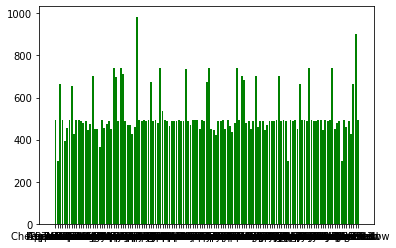

In [13]:
plt.bar(list(train_image_count.keys()), train_image_count.values(), color='g')
plt.show()

In [14]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [15]:
dataset = ImageFolder(data_dir+'/Training', transform=ToTensor())

In [16]:
img, label = dataset[0]
print(img.shape, label)
img,dataset.classes[label]

torch.Size([3, 100, 100]) 0


(tensor([[[0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
          [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
          [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ...,

In [17]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  Apple Braeburn (0)


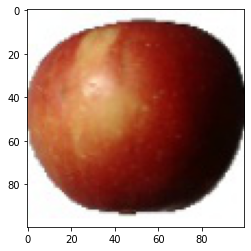

In [18]:
show_example(*dataset[0])

Label:  Physalis (97)


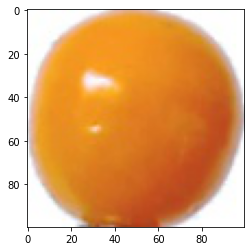

In [19]:
show_example(*dataset[50000])

In [20]:
random_seed = 50
torch.manual_seed(random_seed);
len(dataset)

67692

In [21]:
val_percent = 0.05 #we take 5% data for validation at first
val_size = int(val_percent*len(dataset))
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(64308, 3384)

In [22]:
from torch.utils.data.dataloader import DataLoader

batch_size=128

In [23]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=2, pin_memory=True)

In [24]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

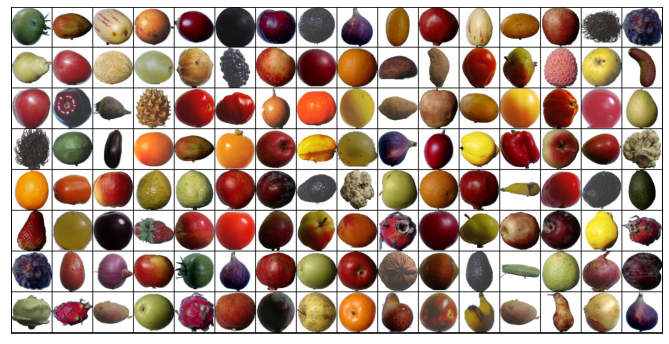

In [25]:
show_batch(train_dl)

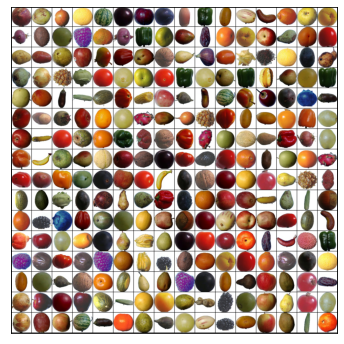

In [26]:
#look at valdation loader
show_batch(val_dl)

In [27]:
for images,_ in train_dl:
    print(images.shape)
    break

torch.Size([128, 3, 100, 100])


In [28]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [29]:
class Fruits360CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 50 x 50

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 25 x 25

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),#output :256*25*25
            nn.MaxPool2d(5, 5), # output: 256 x 5 x 5

            nn.Flatten(), 
            nn.Linear(256*5*5, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 131))
            
        
    def forward(self, xb):
        return self.network(xb)

In [30]:
model = Fruits360CnnModel()
model

Fruits360CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=6400, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_fe

In [31]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 100, 100])
out.shape: torch.Size([128, 131])
out[0]: tensor([-0.0147, -0.0247,  0.0381,  0.0058,  0.0411,  0.0104,  0.0379, -0.0192,
         0.0140,  0.0225,  0.0030,  0.0177, -0.0413, -0.0231, -0.0226, -0.0134,
         0.0135, -0.0065,  0.0340, -0.0147,  0.0039, -0.0210, -0.0362,  0.0097,
         0.0071, -0.0025,  0.0238,  0.0091, -0.0227, -0.0380,  0.0300, -0.0467,
         0.0156,  0.0004, -0.0101, -0.0301, -0.0529, -0.0402, -0.0262, -0.0316,
         0.0607, -0.0417,  0.0015, -0.0472,  0.0062,  0.0333,  0.0221, -0.0220,
        -0.0336, -0.0032,  0.0029,  0.0019, -0.0308, -0.0317,  0.0253, -0.0179,
         0.0144, -0.0090, -0.0198, -0.0057,  0.0212,  0.0126,  0.0227,  0.0059,
        -0.0383,  0.0224,  0.0360,  0.0042, -0.0027, -0.0235, -0.0038,  0.0295,
         0.0459, -0.0187, -0.0143,  0.0368,  0.0125, -0.0266, -0.0512, -0.0021,
        -0.0182,  0.0353, -0.0181,  0.0291, -0.0215, -0.0004,  0.0047,  0.0303,
        -0.0076,  0.0239,  0.0016

In [32]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [33]:
device = get_default_device()
device

device(type='cuda')

In [34]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device)

Fruits360CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=6400, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_fe

In [35]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [36]:
model = to_device(Fruits360CnnModel(), device)

In [37]:
evaluate(model, val_dl)

{'val_acc': 0.0069754463620483875, 'val_loss': 4.875639915466309}

In [38]:
num_epochs = 3
opt_func = torch.optim.Adam
lr = 0.001


In [39]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)


Epoch [0], train_loss: 1.7223, val_loss: 0.1567, val_acc: 0.9463
Epoch [1], train_loss: 0.1250, val_loss: 0.0915, val_acc: 0.9693
Epoch [2], train_loss: 0.0487, val_loss: 0.0446, val_acc: 0.9860


In [41]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

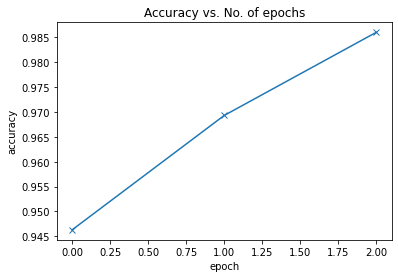

In [42]:
plot_accuracies(history)

In [43]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

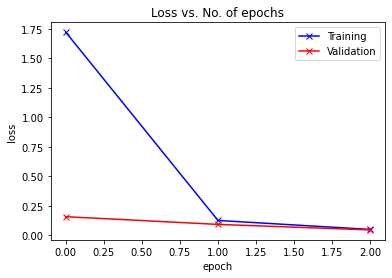

In [44]:
plot_losses(history)

In [45]:
test_dataset = ImageFolder(data_dir+'/Test', transform=ToTensor())

In [46]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: Apple Braeburn , Predicted: Apple Braeburn


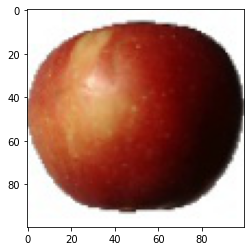

In [47]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Apple Pink Lady , Predicted: Apple Pink Lady


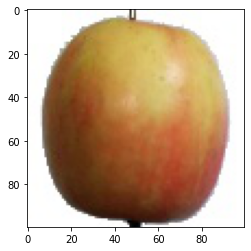

In [48]:
img, label = test_dataset[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Corn Husk , Predicted: Potato Red


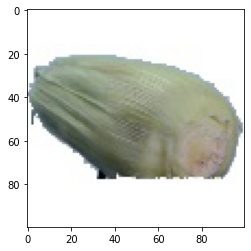

In [49]:
img, label = test_dataset[6157]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [50]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_acc': 0.8983936309814453, 'val_loss': 0.5821388363838196}

In [52]:
torch.save(model.state_dict(), 'fruits360-cnn.pth')

In [53]:
model2 = to_device(Fruits360CnnModel(), device)

In [ ]:
evaluate(model2, test_loader)